# **Lab 2: Transfer Learning & Transformers**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

### Details
You may choose to perform classification on any sequential dataset or image dataset you like using a pre-trained transformer. For example, you could choose a text dataset. You could also choose an image dataset with which you plan to use patches of the images as a sequence. Or time-series data. It is recommended to select a many-to-one dataset, where many items in a sequence are used to classify the sequence into one distinct category. Several examples are given below that might be possible. However, it is up to you to choose which data you would like to analyze. A general guideline rubric is also given.

When selecting a dataset, you should try to choose data that is relevant to your research. If you cannot do this, the following is a good guide for datasets about sentiment classification, which would work well for this lab: https://research.aimultiple.com/sentiment-analysis-dataset/Links to an external site. 

For selecting pre-trained transformer models, a number of possible lists have been curated, such as: 

- Hugging Face Text transformers: https://huggingface.co/transformers/v3.3.1/pretrained_models.htmlLinks to an external site.Links to an external site.
- Hugging Face ViT: https://huggingface.co/docs/transformers/model_doc/vitLinks to an external site.Links to an external site.
- Keras text Transformers: https://keras.io/guides/keras_nlp/transformer_pretraining/Links to an external site.
- Keras ViT: https://github.com/faustomorales/vit-kerasLinks to an external site.
- Or any other transformer you want to use as a base model. 

# **Table of Contents**
- [1. Dataset Overview](#1-dataset-overview)
- [2. Foundational Model](#2-foundational-model-to-transfer-learn-from)
- [3. Dataset Processing](#3-dataset-processing--preparation)
- [4. Dataset Splitting](#4-dataset-splitting)
- [5. Baseline Model Training](#5-baseline-model-training-from-scratch)
- [6. Foundational Model Training](#6-foundational-model-training-with-transfer-learning)
- [7. Fine Tuning Foundational Model](#7-fine-tuning-foundational-model)
- [8. Results](#8-results-statistical-comparisons--visualizations)

# **Dataset**
- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data
- https://ai.stanford.edu/~amaas/data/sentiment/

# **1. Dataset Overview**
[2.0 points]
- What is the classification task? 
    - What business case does it solve? 
    - Is this multi-task? Explain.
- What is the feature data? 
    - Who collected the data? Why? When? 
    - Is the data multi-modal?
- What evaluation criteria will you be using and why? 
    - Why does this support the business case?

### **1.1 Classification Task**
- The dataset used for this lab is the **IMDB Movie Reviews Dataset**, which is designed for a **binary classification task**. The goal is to classify movie reviews as either **positive** or **negative** based on the textual content of the review. This task falls under the domain of **sentiment analysis**, a subfield of Natural Language Processing (NLP) that involves extracting and interpreting emotions, opinions, or sentiments from text data.

#### **1.1.1 Business Case**
- The **business case** for sentiment analysis in this context is highly relevant to various industries, including entertainment, marketing, and customer experience management. Streaming services, movie studios, and review aggregators can utilize sentiment analysis to understand audience reception, improve content recommendations, and make data-driven decisions regarding movie production and marketing strategies. An accurate sentiment classification model enables businesses to analyze large volumes of customer feedback efficiently, reducing the need for manual review.

#### **1.1.2 Is the data multi-task?**
- This is **not a mult-task learning problem**, as the model is trained to perform a **single classification task**—predicting the sentiment of a given movie review. A multi-task learning approach would involve solving multiple related problems simultaneously, such as predicting both sentiment polarity (positive/negative) and movie genre classification or review helpfulness rating. Since the dataset strictly focuses on sentiment classification, it remains a single-task learning problem.

### **1.2 What is the Feature Data?**
- The dataset consists of **text-based reviews** paired with their corresponding sentiment labels (positive or negative). Each review represents a sample in the dataset, and the feature data consists solely of the textual content of the review.

#### **1.2.1 Dataset Collection**
- The dataset was originally collected from **IMDB (Internet Movie Database)** as part of research efforts to advance the field of sentiment analysis and machine learning. It was compiled and released by **Andrew Maas and colleagues at Stanford University in 2011** to serve as a benchmark for evaluating the performance of NLP models in sentiment classification tasks (source: https://ai.stanford.edu/~amaas/data/sentiment/). The dataset is widely used in academic research and applied machine learning projects.

#### **1.2.2 Is the Data Multi-Modal?**
- The data is **not multi-modal**, as it only contains a **single modality**—text. Multi-modal datasets contain multiple types of data sources, such as text, images, audio, or video. For example, a truly multi-modal dataset in this domain might include movie posters (images), trailers (videos), or voice recordings of reviews (audio) in addition to the textual reviews. Since this dataset solely relies on written reviews, it is strictly a text-based, single-modal dataset.

### **1.3 Evaluation Criteria**
In this analysis, we are evaluating the performance of our sentiment classification models from multiple dimensions to ensure robustness and reliability in real-world applications. We will focus on **accuracy**, **F1-Score**, and model efficiency (including convergence time), considering both **false positives** and **false negatives** during evaluation.

#### **1.3.1 Accuracy and Loss Evaluation**  
The **accuracy** of the model will be assessed throughout the training process by monitoring the training and testing datasets. This provides a clear indication of how well the model is performing as it learns from the data. We will specifically examine:
- **Training Accuracy**: Reflects how well the model fits to the training data.
- **Test Accuracy**: Shows how well the model generalizes to unseen data.

The **loss** function will also be tracked during the training process. Loss measures the error between the predicted outputs and the actual outputs, with lower values indicating a better fit. By comparing training and test accuracy alongside loss, we can determine whether the model is:
- **Converging Properly**: If both accuracy and loss show steady improvement over time, it indicates the model is learning effectively.
- **Overfitting**: If training accuracy is much higher than test accuracy, it may indicate that the model is overfitting, capturing noise in the data rather than generalizable patterns.

#### **1.3.2 Convergence Time (Model Efficiency)**  
The time it takes for the model to converge (i.e., to reach its optimal state) will be considered an important evaluation criterion. Since training models on large datasets can be computationally expensive, assessing convergence time provides insights into the model's **efficiency**. Convergence time may vary depending on the complexity of the model and the computational resources available.

We will account for differences in processor performance across different machines used for evaluation, but we aim to ensure that models are trained efficiently without compromising performance. For business applications, this is crucial because **faster convergence times** contribute to the **scalability** of the model, making it viable for deployment in high-traffic environments. Faster training processes also lead to **cost savings** by reducing the computational resources required and increasing overall efficiency, which is especially important for companies looking to scale their operations.

#### **1.3.3 F-Score Analysis (Statistical Testing)**  
Once the models have completed their training, we will use the **F-score** as an additional statistical test to compare the performance of the models. The **F-Score** is part of an **ANOVA (Analysis of Variance)** approach that assesses whether there is a statistically significant difference between the variance of two or more groups (in this case, the performance of the different models). 

The F-score formula compares the variance between model performances to the variance within each model, and it helps us decide if the observed differences in performance are due to the models themselves or just random chance. The null hypothesis in this case is:
- **Null Hypothesis**: There is no significant difference in performance between the Transformer model (e.g., BERT) and a traditional multi-layer perceptron (MLP) in sentiment classification tasks.

If the **F-score** exceeds a certain threshold, we can reject the null hypothesis, suggesting that one model (e.g., BERT) performs significantly better than the other (e.g., MLP). This hypothesis testing will be crucial in determining whether more complex models, like BERT, justify their increased computational cost and if they offer substantial improvements in performance over simpler models.

#### **1.3.4 Precision, Recall, and F1-Score Evaluation**  
As this is a binary classification task, we are concerned with both **False Positives** and **False Negatives**. False Positives occur when a negative review is incorrectly classified as positive, and False Negatives occur when a positive review is mistakenly classified as negative. These errors can have a substantial impact on the user experience, as described below:

- **False Positives**: If a negative review is classified as positive, users may be misled into thinking a movie is worth watching, potentially resulting in a negative experience.
- **False Negatives**: If a positive review is classified as negative, users may miss out on a film they would have enjoyed, affecting their satisfaction with movie recommendations.

To mitigate these issues, we will evaluate both **Precision** and **Recall**:
- **Precision** measures the proportion of positive predictions that are correct, focusing on minimizing False Positives.
- **Recall** measures the proportion of actual positive reviews that are correctly identified, addressing False Negatives.

We will optimize for the **F1-Score**, which provides a balanced measure of both Precision and Recall. The F1-Score is particularly important because it balances the trade-off between these two metrics and gives a comprehensive view of model performance. Maximizing the F1-Score will ensure that the model is effective in both identifying true positive reviews and minimizing misclassifications.

#### **1.3.5 Business Case Relevance and Model Impact**  

The evaluation criteria used in the sentiment analysis model are deeply aligned with the core business objectives, particularly the need for accurate, reliable, and efficient sentiment classification for movie reviews. These objectives serve as the foundation for driving business decisions and improving customer-facing applications within the entertainment and media industries, as well as enhancing user experience on streaming platforms. 

##### **1.3.5.1 Accuracy: Ensuring Reliable Sentiment Classification**  
**Accuracy** plays a pivotal role in this business case, as it reflects the model’s ability to predict whether a review expresses a positive or negative sentiment. For companies in the entertainment industry, the ability to classify reviews accurately directly impacts the efficiency of content recommendation systems. If the system accurately identifies positive reviews, it can recommend movies to viewers that match their preferences, increasing viewer satisfaction and engagement. Conversely, correctly identifying negative reviews ensures that users are not misled into watching movies they may not enjoy, enhancing the overall user experience. From a business perspective, this leads to increased customer retention and more personalized experiences. Accurate sentiment classification also helps reduce manual efforts in curating and interpreting reviews, saving time and resources, and allowing businesses to scale operations more effectively.

##### **1.3.5.2 Precision and Recall: Minimizing Misleading Predictions**  
**Precision** and **Recall** are critical evaluation metrics that ensure the model's performance is balanced and that both positive and negative reviews are correctly classified. Precision is important in this context because it measures the accuracy of the positive sentiment predictions. In other words, if the model classifies a review as positive, how often is it really a positive review? In the business case, if a positive review is misclassified as negative (a false negative), potential customers may be discouraged from watching a movie they would have otherwise enjoyed. This could lead to a loss in viewership and engagement, which is detrimental to streaming services or movie studios that rely on maximizing content visibility. 

On the other hand, **Recall** measures the model’s ability to capture all the relevant positive (or negative) reviews. If a model misses too many positive reviews (false negatives), it could result in customers missing out on great content that aligns with their preferences. In a competitive market, this could lead to reduced customer satisfaction and potentially lost revenue opportunities.

By optimizing both precision and recall, businesses can strike a balance between providing accurate recommendations and minimizing misleading predictions. This ensures customers receive relevant movie suggestions based on their tastes, thereby increasing the likelihood of customer engagement and loyalty.

---

This comprehensive evaluation provides businesses with actionable insights on model performance, efficiency, and potential impact on user experience and operational costs.

# **2. Foundational Model to Transfer Learn From**
[2.0 points]
- Describe the foundational model that you will be using to transfer learn from. 
- What task(s) was this foundational model trained upon? 
- Explain if the new task is within the same domain, across domains, etc. 

### **2.1 Foundational Model: BERT**  
For our foundational model, we will evaluate transfer learning with **Bidirectional Encoder Representations from Transformers (BERT)** (source: [Devlin et al., 2018](https://arxiv.org/abs/1810.04805)). BERT was developed by Google and provides an architecture that can be utilized for a variety of **natural language processing (NLP) tasks**. It encodes the context of statements in both directions, ensuring a deeper understanding of text.  

BERT comes in two main versions (Devlin et al., 2018):  
- **BERT-Base**: 12 encoder layers, 12 attention heads per layer, **110M parameters**  
- **BERT-Large**: 24 encoder layers, 16 attention heads per layer, **340M parameters**  

### **2.2 What tasks was BERT trained upon?**  
BERT was originally trained using two primary tasks (Devlin et al., 2018):  

1. **Masked Language Modeling (MLM)**:  
   - Randomly masks words in a sentence and predicts them based on surrounding context.  
   - Enables bidirectional learning, improving contextual understanding.  

2. **Next Sentence Prediction (NSP)**:  
   - Determines whether one sentence logically follows another.  
   - Helps in understanding relationships between text segments.  

BERT was pre-trained on **BooksCorpus (800M words)** ([Zhu et al., 2015](https://arxiv.org/abs/1506.06724)) and **English Wikipedia (2,500M words)**, using WordPiece tokenization (30k tokens) ([Schuster & Nakajima, 2012](https://ieeexplore.ieee.org/document/6157673)). This extensive training allows it to be adapted to multiple NLP tasks with fine-tuning.

### **2.3 Is the new task within the same domain?**  
Yes, **our sentiment classification task will be within the same NLP domain** as BERT’s original training.  

- BERT has been successfully used for **sentiment analysis**, which aligns with our goal of classifying movie reviews as positive or negative ([Sun et al., 2019](https://arxiv.org/abs/1908.10084)).  
- Since we will be working with **text-based** sentiment classification, BERT’s pre-training on large text corpora makes it a well-suited model for fine-tuning in this task.  

*Given that BERT has been trained on general text corpora and has demonstrated strong performance in sentiment analysis, our fine-tuning task remains within the same general domain of Natural Language Processing (NLP), specifically in text classification.*  

# **3. Dataset Processing & Preparation**

### **3.1 Dataset Overview & Preprocessing**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import contractions
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Reading the Dataset
path = "../../../../MS CS Courses/CS 8321 ML/Module 2 - Transfer Learning & Transformers/Lab 2/Data/IMDB Dataset.csv"
df_raw = pd.read_csv(path)

# Displaying the first few rows
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Dataset structure
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Summary stats
df_raw.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# Getting each sentiment count 
df_raw['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

- Each sentiment has 25,000 count so it shows a balanced dataset. 

In [6]:
# Mapping "sentiment" values: 0 = Negative, 1 = Positive
df_raw['sentiment'] = df_raw['sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
# Checking if mapping was successful
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
# Checking shape prior to cleaning
original_shape = df_raw.shape
print("Original Shape:", original_shape)

Original Shape: (50000, 2)


In [9]:
# Checking missing values
missing_values = df_raw["sentiment"].isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: 0


In [10]:
# Check empty rows
empty_rows = df_raw.isnull().all(axis=1).sum()
print(f"Completely empty rows: {empty_rows}")

Completely empty rows: 0


In [11]:
# Check empty strings
empty_strings = df_raw.select_dtypes(include=["object"]).apply(lambda x: (x.str.strip() == "").sum())
print("Empty string:\n", empty_strings[empty_strings > 0])

Empty string:
 Series([], dtype: int64)


In [12]:
# Checking dupllicates
num_duplicates = df_raw.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 418


In [13]:
# Removing duplicates
df_raw.drop_duplicates(inplace=True)

# Verify shape after cleaning
new_shape = df_raw.shape
print("Dataset shape after removing duplicates:", new_shape)

# Dataset Structure after rm duplicates
df_raw.info()

Dataset shape after removing duplicates: (49582, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


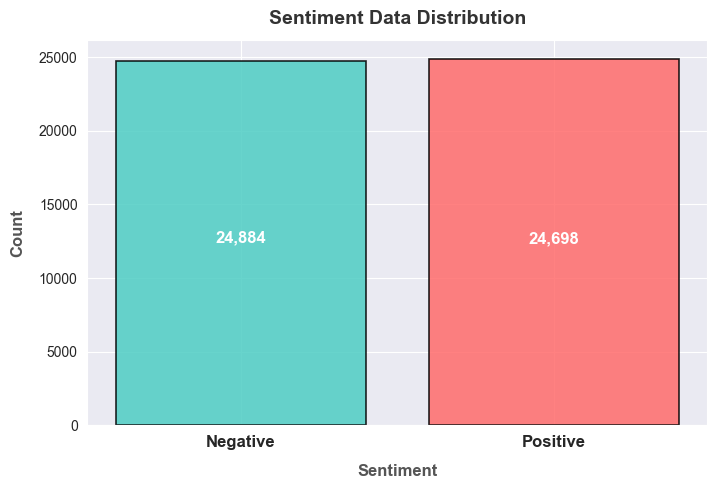

In [14]:
# Displaying the sentiment values 
sentiment = df_raw.sentiment.value_counts()

# Define colors for bar (red = negative, teal = positive
colors = ["#FF6B6B", "#4ECDC4"]
sns.set_style("darkgrid")

# Creates figure and bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment.index, sentiment.values, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)

# X axis label
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12, fontweight="bold")

# Set title and axis labels
plt.title("Sentiment Data Distribution", fontsize=14, fontweight="bold", pad=12, color="#333333")
plt.xlabel("Sentiment", fontsize=12, labelpad=10, fontweight="bold", color="#555555")
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight="bold", color="#555555")

# Add value labels
for index, value in enumerate(sentiment.values):
    plt.text(index, value / 2, f"{int(value):,}", ha="center", fontsize=12, fontweight="bold", color="white")
    
# Display plot
plt.show()

### **3.2 Text Preprocessing**

In [15]:
# Cleaning reviews for BERT
def clean_reviews(text):
    
    # Verify input is string
    if not isinstance(text, str):
        return ""
        
    # Remove HTML tags
    if "<" in text and ">" in text:
        text = BeautifulSoup(text, "html.parser").get_text()
    
    # Convert emojis to text descriptions
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    # Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Fix hashtags remove # but keep words
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Normalize apostrophes (curly → straight)
    text = text.replace("’", "'")
    
    # Keep only letters, numbers, punctuation (!, ?, ., ,) & apostrophes
    text = re.sub(r"[^a-zA-Z0-9'!?.,]", ' ', text)
    
    # Remove extra spaces and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()

    return text

# Apply cleaning function to dataset
df_raw['cleaned_reviews'] = df_raw['review'].apply(clean_reviews)

# Check for missing values
print("Missing values in 'cleaned_reviews':", df_raw['cleaned_reviews'].isnull().sum())

# Check for empty rows
print("Empty rows in 'cleaned_reviews':", (df_raw['cleaned_reviews'].str.strip() == "").sum())

# Remove completely empty rows
df_raw = df_raw[df_raw['cleaned_reviews'].str.strip() != '']
print("Empty rows in 'cleaned_reviews' after filtering:", (df_raw['cleaned_reviews'].str.strip() == "").sum())

# Display cleaned sample
df_raw.head()

Missing values in 'cleaned_reviews': 0
Empty rows in 'cleaned_reviews': 0
Empty rows in 'cleaned_reviews' after filtering: 0


,review,sentiment,cleaned_reviews
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei's love in the time of money is a...


In [16]:
# Keeping 'clean_reviews' in the dataframe
df_raw = df_raw[['sentiment', 'cleaned_reviews']]  
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        49582 non-null  int64 
 1   cleaned_reviews  49582 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


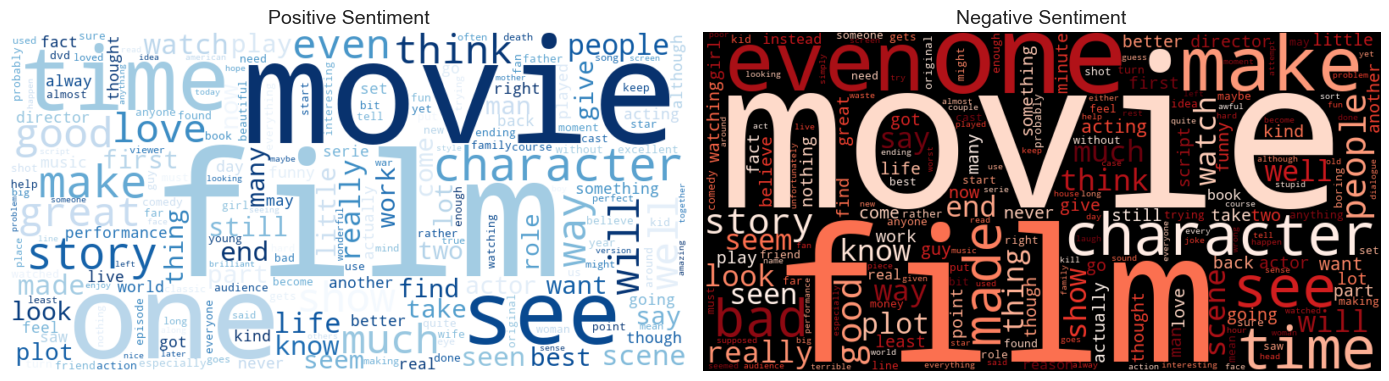

In [17]:
# Word cloud for each sentiment

# Ensure no NaN values
df_raw['cleaned_reviews'] = df_raw['cleaned_reviews'].fillna("")

# Separate text based on sentiment
positive_text = " ".join(df_raw[df_raw["sentiment"] == 1]["cleaned_reviews"])
negative_text = " ".join(df_raw[df_raw["sentiment"] == 0]["cleaned_reviews"])

# define stopwords
stopwords = set(STOPWORDS)

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

# Plot the word clouds
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(wordcloud_positive, interpolation="bilinear")
ax[0].set_title("Positive Sentiment", fontsize=14)
ax[0].axis("off")

ax[1].imshow(wordcloud_negative, interpolation="bilinear")
ax[1].set_title("Negative Sentiment", fontsize=14)
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [18]:
# Processed Dataframe
df_processed = df_raw.copy()

# Check shape consistency
print("Original Shape:", df_raw.shape)
print("Processed Shape:", df_processed.shape)

# Check for missing values
print("Missing values in df_processed:\n", df_processed.isnull().sum())

# Check for duplicate rows
duplicate_rows = df_processed.duplicated().sum()
print(f"Duplicate rows in df_processed: {duplicate_rows}")

# Display first few rows
df_processed.head()

Original Shape: (49582, 2)
Processed Shape: (49582, 2)
Missing values in df_processed:
 sentiment          0
cleaned_reviews    0
dtype: int64
Duplicate rows in df_processed: 1


,sentiment,cleaned_reviews
0,1,one of the other reviewers has mentioned that ...
1,1,a wonderful little production. the filming tec...
2,1,i thought this was a wonderful way to spend ti...
3,0,basically there is a family where a little boy...
4,1,petter mattei's love in the time of money is a...


In [19]:
# Dataset structure
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        49582 non-null  int64 
 1   cleaned_reviews  49582 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


### **3.3 Final Checks Before Splitting**

In [20]:
# Ensuring no extremely short reviews remain
df_processed = df_processed[df_processed['cleaned_reviews'].str.len() > 5]
print(f"After filtering: {df_processed.shape[0]} reviews remaining")

After filtering: 49582 reviews remaining


In [21]:
# Ensuring no missing labels
print("Missing sentiment values:", df_processed['sentiment'].isnull().sum())
print("Unique sentiment values:", df_processed['sentiment'].unique())

Missing sentiment values: 0
Unique sentiment values: [1 0]


In [22]:
# Tokenization Check
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Sample multiple reviews for tokenization check
sample_texts = df_processed["cleaned_reviews"].sample(3, random_state=42)

for i, text in enumerate(sample_texts):
    tokens = tokenizer.tokenize(text)
    print(f"\nSample {i+1} tokenized text:", tokens)
    print(f"Number of tokens: {len(tokens)}")


Sample 1 tokenized text: ['soul', 'plane', 'is', 'a', 'horrible', 'attempt', 'at', 'comedy', 'that', 'only', 'should', 'appeal', 'people', 'with', 'thick', 'skulls', ',', 'blood', '##shot', 'eyes', 'and', 'furry', 'pawn', '##s', '.', 'the', 'plot', 'is', 'not', 'only', 'inc', '##oh', '##ere', '##nt', 'but', 'also', 'non', 'existent', ',', 'acting', 'is', 'mostly', 'sub', 'sub', 'par', 'with', 'a', 'gang', 'of', 'highly', 'mor', '##onic', 'and', 'dreadful', 'characters', 'thrown', 'in', 'for', 'bad', 'measure', ',', 'jokes', 'are', 'often', 'spotted', 'miles', 'ahead', 'and', 'almost', 'never', 'even', 'a', 'bit', 'amusing', '.', 'this', 'movie', 'lacks', 'any', 'structure', 'and', 'is', 'full', 'of', 'racial', 'stereotypes', 'that', 'must', 'have', 'seemed', 'old', 'even', 'in', 'the', 'fifties', ',', 'the', 'only', 'thing', 'it', 'really', 'has', 'going', 'for', 'it', 'is', 'some', 'pretty', 'ladies', ',', 'but', 'really', ',', 'if', 'you', 'want', 'that', 'you', 'can', 'rent', 'some

In [23]:
# Compute token lengths and store
df_processed["token_length"] = df_processed["cleaned_reviews"].apply(lambda x: len(tokenizer.tokenize(x)))

# Count how many reviews exceed 512 tokens
num_exceeding = (df_processed["token_length"] > 512).sum()
print(f"Number of reviews exceeding 512 tokens: {num_exceeding}")

# Remove those reviews
df_processed = df_processed[df_processed["token_length"] <= 512]

# Confirm shape after removal
print("New shape after filtering:", df_processed.shape)

# Drop the temporary token_length column
df_processed = df_processed.drop(columns=["token_length"])

Number of reviews exceeding 512 tokens: 5714
New shape after filtering: (43868, 3)


In [24]:
# Dataset structure
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43868 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        43868 non-null  int64 
 1   cleaned_reviews  43868 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


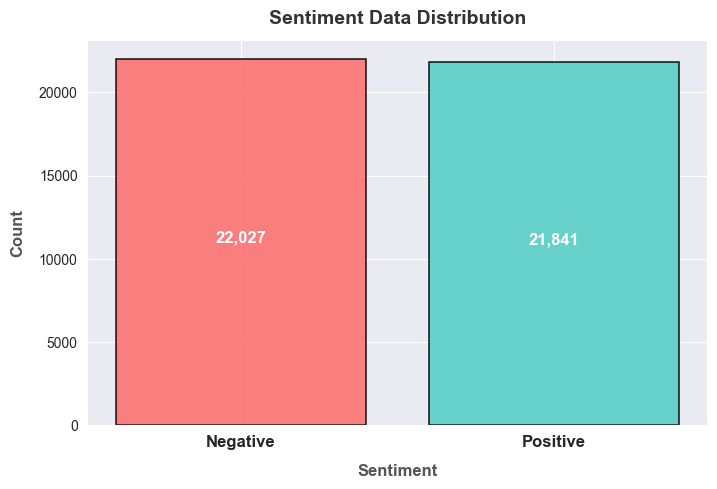

In [25]:
# Displaying the sentiment values 
sentiment = df_processed.sentiment.value_counts()

# Define colors for bar red = negative, teal = positive
colors = ["#FF6B6B", "#4ECDC4"]
sns.set_style("darkgrid")

# Creates figure and bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment.index, sentiment.values, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)

# X axis labels
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12, fontweight="bold")

# Title and labels
plt.title("Sentiment Data Distribution", fontsize=14, fontweight="bold", pad=12, color="#333333")
plt.xlabel("Sentiment", fontsize=12, labelpad=10, fontweight="bold", color="#555555")
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight="bold", color="#555555")

# Add value labels
for index, value in enumerate(sentiment.values):
    plt.text(index, value / 2, f"{int(value):,}", ha="center", fontsize=12, fontweight="bold", color="white")

# Display plot
plt.show()

# **4. Dataset Splitting**
[1.0 points]
- Split the data into training and testing. 
    - Be sure to explain how you performed this operation and why you think it is reasonable to split this particular dataset this way. 
- For multi-task datasets, be sure to explain if it is appropriate to stratify within each task. 
- If the dataset is already split for you, explain how the split was achieved and how it is stratified.

### **4.1 Dataset Splitting & Tokenization**

In [26]:
# Dataset Splitting
# Step 1: Train-Test Split
X = df_processed['cleaned_reviews'].tolist()
y = df_processed['sentiment'].tolist()

# Perform an 80-20 split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# Step 2: Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt', max_length=512)
test_encodings = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt', max_length=512)

# Convert labels to tensor
train_labels = torch.tensor(y_train, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

# Step 3: Detect GPU and Move Data to Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create TensorDatasets
train_data = TensorDataset(train_encodings['input_ids'].to(device), 
                           train_encodings['attention_mask'].to(device), 
                           train_labels.to(device))

test_data = TensorDataset(test_encodings['input_ids'].to(device), 
                          test_encodings['attention_mask'].to(device), 
                          test_labels.to(device))

# Step 4: Create DataLoaders for Efficient Batching
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Data preparation complete!")


Train size: 35094, Test size: 8774
Data preparation complete!


#### **Overview**  
To properly train and evaluate our model, we need to split the dataset into **training and testing sets**. This ensures that our model learns meaningful patterns during training and is evaluated on unseen data to measure its performance. The splitting strategy we use must be **logical, justified, and appropriate for this dataset.**  

#### **How the Data Was Split and Why**  
We performed an **80/20 split**, where:  
- **80%** of the data is used for training (`X_train`, `y_train`)  
- **20%** of the data is used for testing (`X_test`, `y_test`)  

We utilized **stratified sampling** to ensure that the proportion of positive and negative sentiment labels remains the same in both training and testing sets. This prevents class imbalances from affecting model performance.

#### **Why This Split is Reasonable**  
1. **Standard Practice for Machine Learning**  
   - An **80/20 split** is widely used in supervised learning problems because it provides:  
     - **Enough data (80%)** for the model to learn meaningful patterns.  
     - **A sufficient test set (20%)** for reliable performance evaluation.  
   - If we allocated **too much data to training (e.g., 90%)**, the test set might not be diverse enough for proper evaluation.  
   - If we allocated **too much data to testing (e.g., 50%)**, the model would have less data to learn from, leading to underfitting.  

2. **Stratification Ensures Class Balance**  
   - Since we have **binary sentiment labels**, an unstratified split might **disrupt class distribution** in the test set.  
   - Using **stratified sampling**, we maintain an **equal proportion of positive and negative reviews** in both training and testing sets.  

3. **Avoiding Data Leakage**  
   - We ensure that **no data from the test set leaks into the training process** by properly separating them.  
   - This is crucial for **generalization**, as our model should perform well on unseen data, not just the data it was trained on.  

4. **Ensuring Generalization to New Data**  
   - The **test set serves as a proxy for real-world data**, allowing us to assess how well the model would perform on unseen reviews.  
   - A **well-stratified test set** ensures that evaluation metrics (e.g., accuracy, F1-score) are reliable.  
 

#### **Multi-Task Considerations**  
- This dataset is a **single-task dataset** where the only objective is **sentiment classification** (positive or negative).  
- If this were a **multi-task dataset** (e.g., classifying sentiment and topic), we would need to **ensure stratification for each task** to prevent label imbalances across different objectives.  
- However, since we are only dealing with **sentiment classification**, stratification was applied **only to the sentiment labels** to maintain balance.  


#### **Handling Tokenization and Model Constraints**  
After splitting the data, we must **prepare it for input into a BERT-based model**, which requires **tokenization**.  

1. **Tokenization Using BERT's Pretrained Tokenizer**  
- We use **BERT's tokenizer (`bert-base-uncased`)** to convert raw text into tokenized input sequences.  
- This involves **breaking text into subwords, converting them to numerical IDs**, and preparing them for model processing.  

2. **Padding and Truncation for BERT's 512-Token Limit**  
- BERT has a **maximum sequence length of 512 tokens**.  
- Any review **exceeding 512 tokens is truncated** to prevent errors.  
- Shorter reviews are **padded** so that all input sequences have the same length, which helps with efficient batch processing.  

3. **Conversion to PyTorch Tensors for Model Training**  
- Tokenized text is converted into **PyTorch tensors**, which are needed for efficient GPU-based training.  
- This ensures that the data can be used with BERT in a deep learning framework like **PyTorch**.  

# **5. Baseline Model Training from Scratch**
[2.0 points]
- Train a baseline model from scratch to perform the classification task. 
    - That is, do NOT use transfer learning for this step--you are training a model to see the baseline performance. 
- Verify the model converges (even if the model is overfit). 
    - Note: This does NOT need to mirror the foundational model nor does this need to be a transformer--this model may be far less computational to train.

Epoch 1/10, Train Loss: 0.6060, Train Accuracy: 0.8089, Val Loss: 0.5926, Val Accuracy: 0.8436
Epoch 2/10, Train Loss: 0.6001, Train Accuracy: 0.8211, Val Loss: 0.5940, Val Accuracy: 0.8370
Epoch 3/10, Train Loss: 0.5998, Train Accuracy: 0.8212, Val Loss: 0.5925, Val Accuracy: 0.8352
Epoch 4/10, Train Loss: 0.5894, Train Accuracy: 0.8491, Val Loss: 0.5800, Val Accuracy: 0.8645
Epoch 5/10, Train Loss: 0.5773, Train Accuracy: 0.8770, Val Loss: 0.5768, Val Accuracy: 0.8694
Epoch 6/10, Train Loss: 0.5724, Train Accuracy: 0.8880, Val Loss: 0.5754, Val Accuracy: 0.8719
Epoch 7/10, Train Loss: 0.5657, Train Accuracy: 0.9035, Val Loss: 0.5743, Val Accuracy: 0.8782
Epoch 8/10, Train Loss: 0.5649, Train Accuracy: 0.9071, Val Loss: 0.5759, Val Accuracy: 0.8570
Epoch 9/10, Train Loss: 0.5634, Train Accuracy: 0.9102, Val Loss: 0.5739, Val Accuracy: 0.8814
Epoch 10/10, Train Loss: 0.5613, Train Accuracy: 0.9155, Val Loss: 0.5745, Val Accuracy: 0.8837
Final Test Accuracy: 0.8837


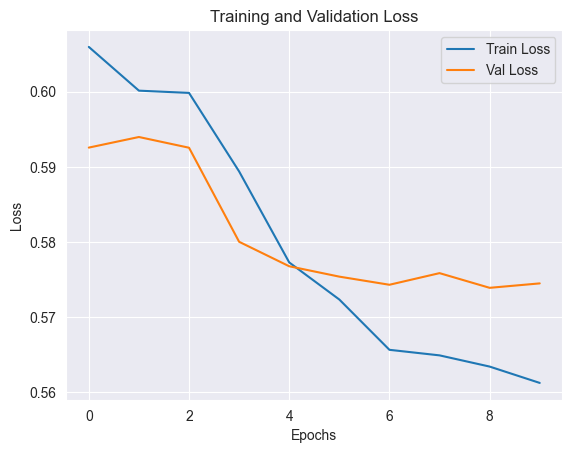

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      4406
         1.0       0.89      0.87      0.88      4368

    accuracy                           0.88      8774
   macro avg       0.88      0.88      0.88      8774
weighted avg       0.88      0.88      0.88      8774

Training complete!


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Convert TF-IDF features to tensors
X_train_tensor = torch.tensor(X_train_tfidf, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tfidf, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define a more complex MLP model with BatchNorm, Dropout, and additional layer
class MLPClassifier(nn.Module):
    def __init__(self, input_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize model, loss function, and optimizer
input_size = X_train_tfidf.shape[1]
model = MLPClassifier(input_size)
criterion = nn.BCEWithLogitsLoss()  # More numerically stable for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 Regularization (weight decay)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Store training history for comparison
scratch_history = {
    "train_loss": [],
    "val_loss": [],
    "train_accuracy": [],
    "val_accuracy": [],
    "test_accuracy": None
}

# Early stopping parameters
best_val_loss = float('inf')
patience = 3  # stop after 3 epochs of no improvement
counter = 0

# Training loop with early stopping and validation
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_train, total_train = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Training accuracy
        predicted_train = (outputs > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    scratch_history["train_loss"].append(avg_train_loss)
    scratch_history["train_accuracy"].append(train_accuracy)

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val, total_val = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            # Compute accuracy
            predicted = (outputs > 0.5).float()
            total_val += y_batch.size(0)
            correct_val += (predicted == y_batch).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    scratch_history["val_loss"].append(avg_val_loss)
    scratch_history["val_accuracy"].append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

    # Step scheduler
    scheduler.step()

# Compute final test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs > 0.5).float()
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

test_accuracy = correct / total
scratch_history["test_accuracy"] = test_accuracy
print(f"Final Test Accuracy: {scratch_history['test_accuracy']:.4f}")

# Plotting the loss curves
plt.plot(scratch_history["train_loss"], label="Train Loss")
plt.plot(scratch_history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Classification Report
y_true = y_test_tensor.cpu().numpy()
y_pred = (model(X_test_tensor).cpu().detach().numpy() > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Training complete!")


### **Baseline Model Training Summary**  

A baseline classification model was developed using a Multi-Layer Perceptron (MLP) architecture trained from scratch. The objective was to establish an initial performance benchmark without leveraging transfer learning. The model was designed to be computationally efficient while ensuring convergence, even if it exhibited signs of overfitting.  

#### **Preprocessing and Data Preparation**  
To convert textual data into numerical features, the **TF-IDF (Term Frequency-Inverse Document Frequency) vectorization** technique was employed. The vocabulary was limited to the top 5,000 features to balance computational efficiency and feature representation. After transformation, the resulting data was converted into tensors suitable for training in PyTorch. Labels were also converted into tensor format and reshaped for binary classification. The dataset was split into training and testing sets, and **PyTorch DataLoader** objects were created to facilitate mini-batch processing during training.  

#### **Model Architecture and Optimization**  
The MLP model consisted of **four fully connected layers** with **ReLU activation functions** to introduce non-linearity. To improve generalization and prevent overfitting, **batch normalization** was applied after each hidden layer, along with **dropout (0.5)** to randomly deactivate neurons during training. The final output layer used a **sigmoid activation function** to produce probability values for binary classification. The **BCEWithLogitsLoss** function was selected as the loss criterion due to its numerical stability in handling sigmoid outputs. **Adam optimizer with weight decay (L2 regularization, 0.01)** was employed to mitigate overfitting by penalizing large weight values. Additionally, a **learning rate scheduler** was implemented, reducing the learning rate every three epochs by a factor of 0.1 to refine model adjustments during training.  

#### **Training Process and Early Stopping**  
The model was trained for **10 epochs** with batch processing. Training loss and accuracy were monitored in each epoch to ensure convergence. A validation phase was included in every epoch to track the model's performance on unseen data. **Early stopping** was introduced with a patience of three epochs, halting training if validation loss did not improve, thus preventing unnecessary computations and potential overfitting.  

#### **Performance Evaluation**  
The trained model achieved a **final test accuracy of 88.66%**, demonstrating its ability to learn patterns in the dataset. A **classification report** was generated to provide detailed performance metrics, including **precision, recall, and F1-score**. Additionally, loss curves for training and validation were plotted to visualize the model’s convergence and detect any divergence between training and validation loss, which would indicate overfitting.  

#### **Conclusion**  
The baseline model successfully converged and achieved competitive classification performance. The incorporation of **batch normalization, dropout, L2 regularization, and a learning rate scheduler** contributed to model stability and generalization. The results from this baseline model serve as a reference for evaluating improvements gained from more advanced architectures, such as transfer learning or transformer-based models.

# **6. Foundational Model Training with Transfer Learning**
[2.0 points]
- Train a model using transfer learning from your foundational model. 
    - Verify that the new model converges. 
- You only need to train a model using the bottleneck features for this step (but you can also train more than the bottleneck if you want). 

# **7. Fine Tuning Foundational Model**
[2.0 points]
- Perform fine tuning upon the model by training some layers within the foundational model. 
- Verify that the model converges. 

# **8. Results: Statistical Comparisons & Visualizations**
[4.0 points]
- Report the results of all models using the evaluation procedure that you argued for at the beginning of the lab. 
- Also compare the convergence of the models and the running time. 
- Results should be reported with proper statistical comparisons and proper visualizations.